# **Visualizing Learning Performance**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

import os

In [2]:
def process_paths(measurement_case, create_dir=True,
                  base_result_path = "../../results/",
                  base_doc_path = "../../doc/"):
    """
        Calculates and creates (if needed) paths for visualizing.
        Parameters:
            - measurement_case: measurement name (directory in results directory)
            - create_dir: creates directory in doc folder if True and the target plot directory does not exist
    """
    meas_path = base_result_path + measurement_case + "/"
    plot_path = base_doc_path + measurement_case + "/"
    
    if (create_dir) and (not(os.path.isdir(plot_path))):
        os.mkdir(plot_path)
    return meas_path, plot_path

## **Baseline**

In [18]:
MEASUREMENT_CASE = "baseline"

In [19]:
MEASUREMENT_PATH, PLOT_SAVE_PATH = process_paths(MEASUREMENT_CASE)
MEASUREMENT_FILE = MEASUREMENT_PATH + "performance.csv"
PLOT_SAVE_FILE = PLOT_SAVE_PATH + "performance.png"

In [20]:
perf_data = pd.read_csv(MEASUREMENT_FILE)

In [21]:
x = perf_data[perf_data["metric"] == "test_loss"]["epoch"]

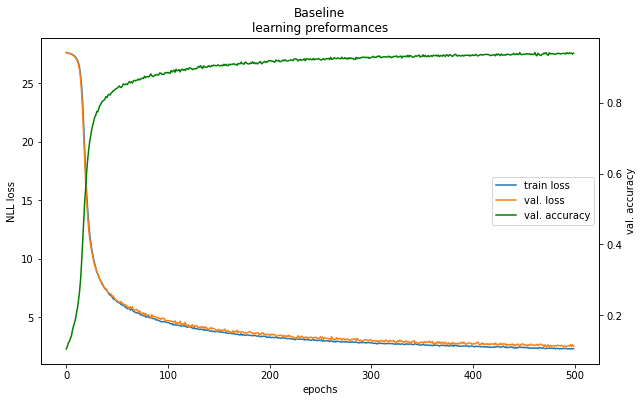

In [22]:
fig, ax = plt.subplots(figsize=[10,6])

twin1 = ax.twinx()

p1, = ax.plot(x, perf_data[perf_data["metric"] == "train_loss"]["value"], label="train loss")
p2, = ax.plot(x, perf_data[perf_data["metric"] == "test_loss"]["value"], label="val. loss")
ax.set_ylabel("NLL loss")

p3, = twin1.plot(x, perf_data[perf_data["metric"] == "test_accuracy"]["value"], color="green", label="val. accuracy")
twin1.set_ylabel("val. accuracy")

ax.set_xlabel("epochs")
ax.set_title("Baseline\nlearning preformances")
ax.legend(handles=[p1, p2, p3], loc="center right")

plt.savefig(PLOT_SAVE_FILE)

## **Federated system**

In [23]:
MEASUREMENT_CASE = "fed_noshare"
N_CLIENTS = 10

In [24]:
MEASUREMENT_PATH, PLOT_SAVE_PATH = process_paths(MEASUREMENT_CASE)

Text(0.5, 1.0, 'fed_noshare\nlearning preformances')

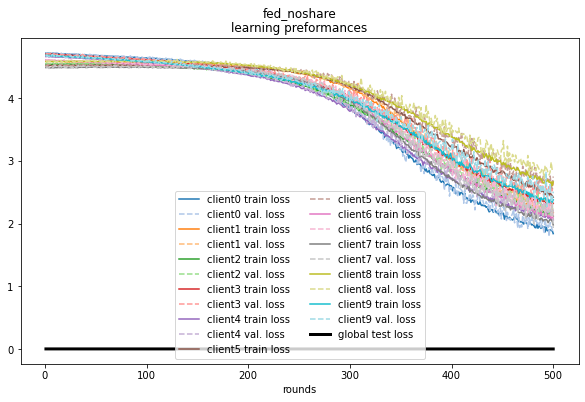

In [25]:
cmap = plt.get_cmap('tab20') 
cnorm  = colors.Normalize(vmin=0, vmax=2*N_CLIENTS)
scalar_map = cm.ScalarMappable(norm=cnorm, cmap=cmap)

fig, ax = plt.subplots(figsize=[10,6])

for i in range(N_CLIENTS):
    client_path = MEASUREMENT_PATH+"client%d.csv"%i
    client_df = pd.read_csv(client_path)
    x = client_df[client_df["metric"]=="train_loss"]["round"]
    ax.plot(x, client_df[client_df["metric"]=="train_loss"]["value"],
            color=scalar_map.to_rgba(i*2), label="client%d train loss"%i)
    ax.plot(x, client_df[client_df["metric"]=="test_loss"]["value"], "--",
            color=scalar_map.to_rgba(i*2+1), label="client%d val. loss"%i)
    
global_df = pd.read_csv(MEASUREMENT_PATH+"global.csv")
x = global_df["round"]
ax.plot(x, global_df["loss"], linewidth=3,
            color="k", label="global test loss")
    
ax.legend(loc="lower center", ncol=2)

ax.set_xlabel("rounds")
ax.set_title("%s\nlearning preformances"%MEASUREMENT_CASE)

Text(0.5, 1.0, 'fed_noshare\nAccuracies')

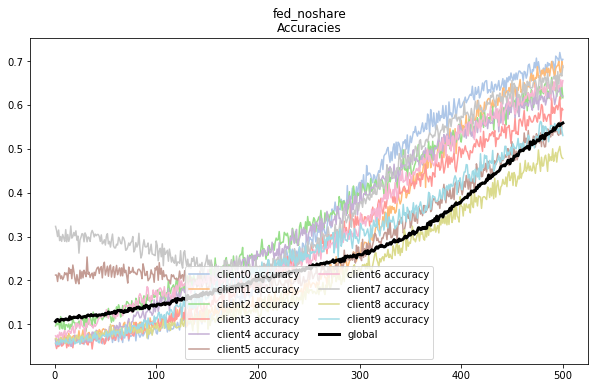

In [26]:
cmap = plt.get_cmap('tab20') 
cnorm  = colors.Normalize(vmin=0, vmax=2*N_CLIENTS)
scalar_map = cm.ScalarMappable(norm=cnorm, cmap=cmap)

fig, ax = plt.subplots(figsize=[10,6])

for i in range(N_CLIENTS):
    client_path = MEASUREMENT_PATH+"client%d.csv"%i
    client_df = pd.read_csv(client_path)
    x = client_df[client_df["metric"]=="train_loss"]["round"]
    ax.plot(x, client_df[client_df["metric"]=="test_accuracy"]["value"],
            color=scalar_map.to_rgba(i*2+1), label="client%d accuracy"%i)
    
global_df = pd.read_csv(MEASUREMENT_PATH+"global.csv")
x = global_df["round"]
ax.plot(x, global_df["accuracy"], linewidth=3,
            color="k", label="global")
    
ax.legend(loc="lower center", ncol=2)
ax.set_title("%s\nAccuracies"%MEASUREMENT_CASE)